**PROJECT: DỰ ĐOÁN NGUY CƠ MẮC CÁC VẤN ĐỀ LIÊN QUAN ĐẾN SỨC KHỎE TINH THẦN**

**Chú thích dữ liệu**

| Cột | Mô tả |
|:----|:------|
| **age** | Độ tuổi |
| **gender** | Giới tính ( Male - nam,  Female - nữ) |
| **employment_status** | Tình trạng việc làm |
| **work_environment** | Môi trường làm việc |                  
| **mental_health_history** | Có lịch sử mắc vấn đề về sức khỏe tinh thần |          
| **seeks_treatment** | Có tìm đến điều trị hay không |
| **stress_level** | Mức độ căng thẳng (từ 1 đến 10) |
| **sleep_hour** | Số giờ ngủ mỗi ngày |
| **physical_activity_days** | Số ngày vận động mỗi tuần |
| **depression_score** | Điểm đo lường triệu chứng trầm cảm |                  
| **anxiety_score** | Điểm đo lường độ mức lo âu |  
| **social_support_score** | Điểm đánh giá mức độ hỗ trợ xã hội(gia đình, bạn bè,...) |  
| **productivity_score** | Đánh giá năng suất làm việc |  
| **mental_health_risk** | Nguy cơ sức khỏe tinh thần|  

# **1. IMPORT MODULE**

In [1]:
import sys
sys.path.append('../../')

from project import *

# **2. TIỀN XỬ LÝ DỮ LIỆU**

## **2.1. LOAD DATA**

In [2]:
# Nạp dữ liệu
d = DataPreprocessor.load('mental_health_dataset.csv')

# In ra thông tin về dữ liệu
d.summary()


Kích thước dữ liệu: (10000, 14)

Mô tả dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     9992 non-null   object 
 1   gender                  9998 non-null   object 
 2   employment_status       9994 non-null   object 
 3   work_environment        9999 non-null   object 
 4   mental_health_history   9988 non-null   object 
 5   seeks_treatment         9990 non-null   object 
 6   stress_level            9997 non-null   float64
 7   sleep_hours             9992 non-null   float64
 8   physical_activity_days  9990 non-null   float64
 9   depression_score        9998 non-null   float64
 10  anxiety_score           9993 non-null   float64
 11  social_support_score    9997 non-null   float64
 12  productivity_score      9995 non-null   float64
 13  mental_health_risk      9999 non-null   obj

---
**Nhận xét**: Ta thấy cột `age` có kiểu dữ liệu chuỗi nên ta chuyển sang kiểu dữ liệu số

---

In [3]:
d.convert()

age                        object
gender                     object
employment_status          object
work_environment           object
mental_health_history      object
seeks_treatment            object
stress_level              float64
sleep_hours               float64
physical_activity_days    float64
depression_score          float64
anxiety_score             float64
social_support_score      float64
productivity_score        float64
mental_health_risk         object
dtype: object


In [4]:
# Tạo đặc trưng mới
d.create_new_feature()

10000 rows, 15 cols

In [5]:
# Phân loại các cột
cat_cols, num_cols = d.feature_separation()

Các cột phân loại: ['gender', 'employment_status', 'work_environment', 'mental_health_history', 'seeks_treatment', 'mental_health_risk']
Các cột số: ['age', 'stress_level', 'sleep_hours', 'physical_activity_days', 'depression_score', 'anxiety_score', 'social_support_score', 'productivity_score', 'productivity_base_on_stress']


## **2.2. TRỰC QUAN HÓA DỮ LIỆU BAN ĐẦU**

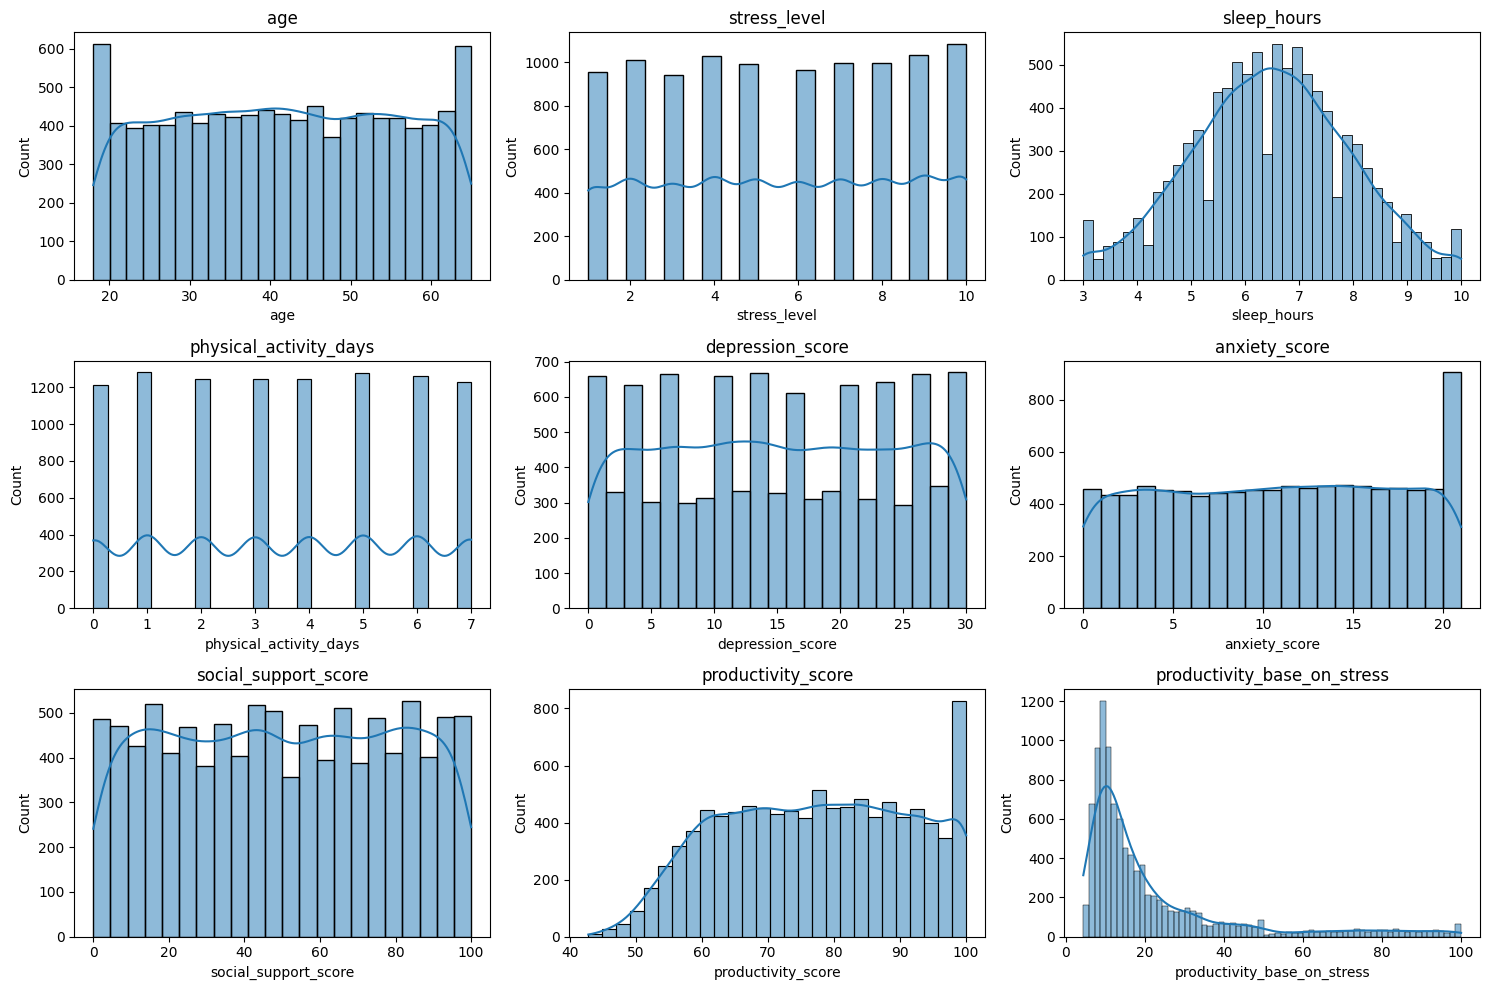

In [6]:
# Histogram cho các cột số
d.histogram()

c:\Users\Admin\Documents\workspace\Python4DS\project\notebook\../..\project\preprocessing\Preprocess.py:235: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  lambda col: sns.countplot(y=self.data[col], edgecolor="black", palette="pastel"))
c:\Users\Admin\Documents\workspace\Python4DS\project\notebook\../..\project\preprocessing\Preprocess.py:235: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  lambda col: sns.countplot(y=self.data[col], edgecolor="black", palette="pastel"))
c:\Users\Admin\Documents\workspace\Python4DS\project\notebook\../..\project\preprocessing\Preprocess.py:235: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` a

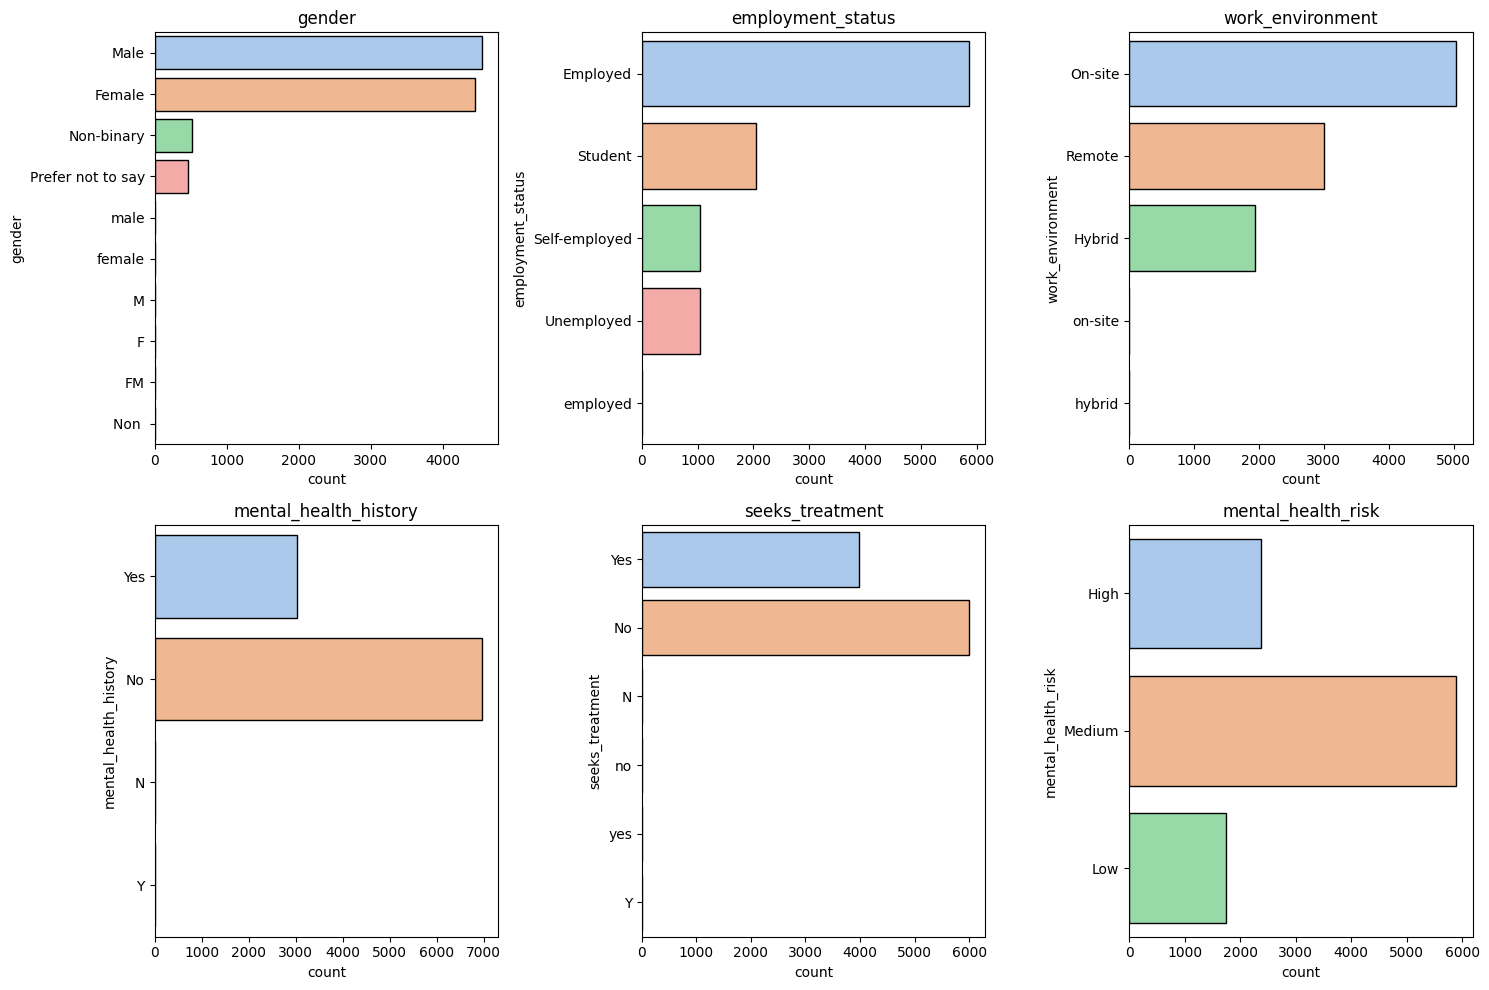

In [7]:
# Barplot cho các cột categorical
d.barplot()

## **2.3. HANDLE MISSING VALUE**

In [8]:
# Xử lý dữ liệu thiếu
d.handle_missing_numeric()
d.handle_missing_categorical()

10000 rows, 15 cols

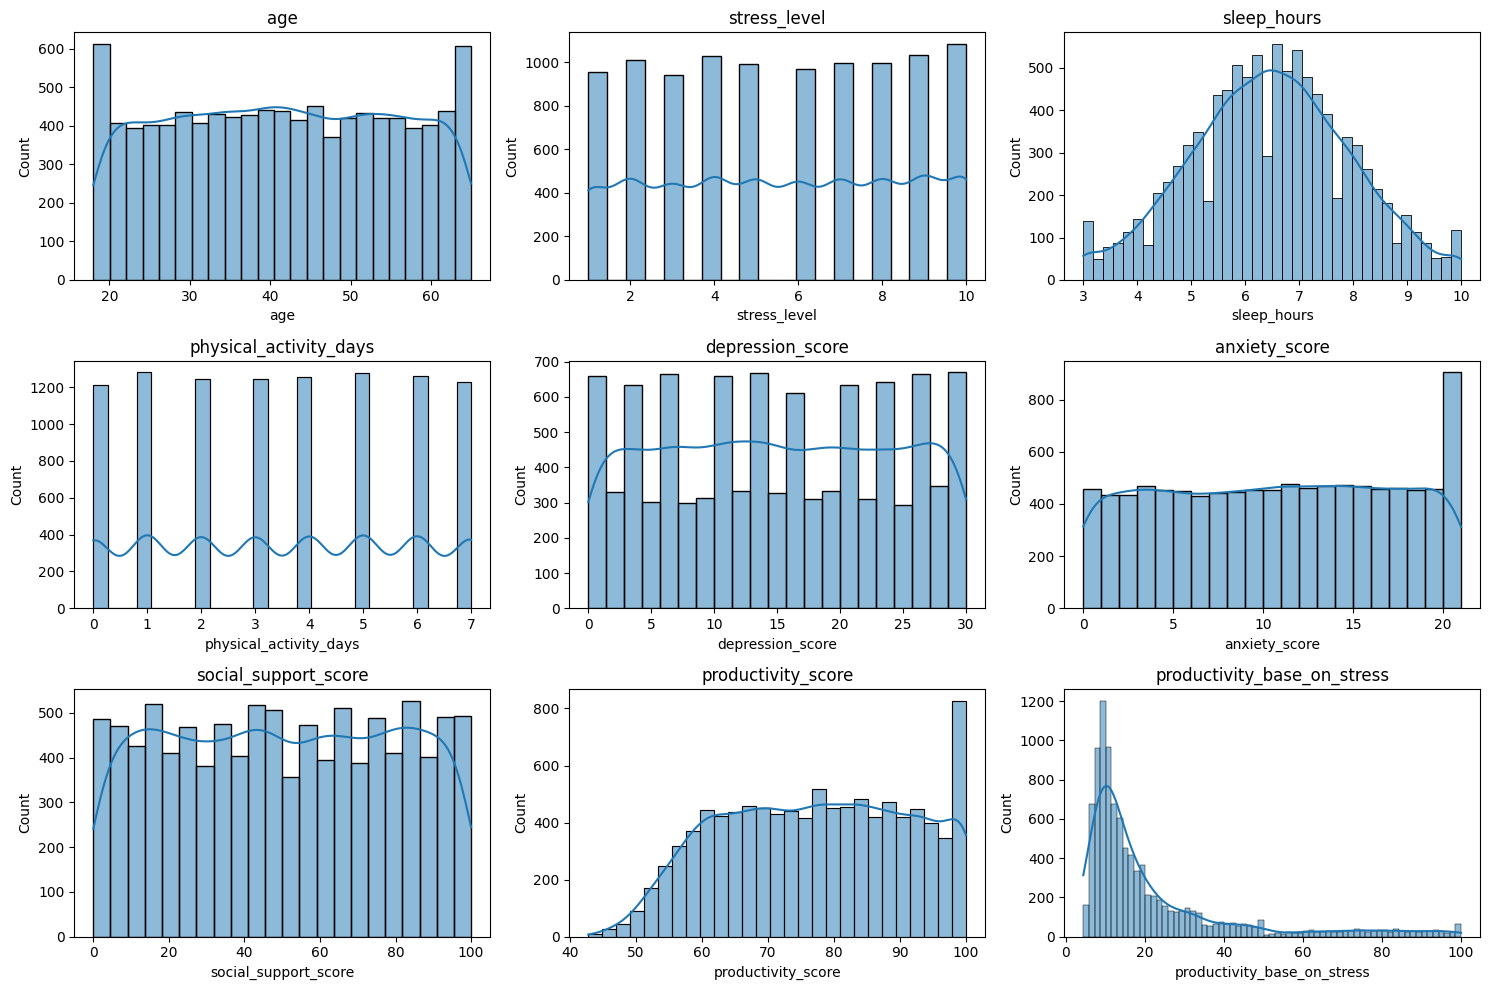

In [9]:
# Kiểm tra lại dữ liệu số sau khi xử lý giá trị thiếu
d.histogram()

## **2.4. NORMALIZE DATA**

In [10]:
# Chuẩn hóa đữ liệu trong các cột categorical
d.normalize_categorical()

********************
gender
Male                 4544
Female               4453
Non-binary            520
Prefer not to say     466
male                    9
M                       4
female                  1
F                       1
FM                      1
Non                     1
Name: count, dtype: int64
********************
employment_status
Employed         5871
Student          2042
Self-employed    1044
Unemployed       1042
employed            1
Name: count, dtype: int64
********************
work_environment
On-site    5043
Remote     3009
Hybrid     1946
on-site       1
hybrid        1
Name: count, dtype: int64
********************
mental_health_history
No     6970
Yes    3025
N         3
Y         2
Name: count, dtype: int64
********************
seeks_treatment
No     6009
Yes    3985
N         3
no        1
yes       1
Y         1
Name: count, dtype: int64
********************
mental_health_risk
Medium    5892
High      2369
Low       1739
Name: count, dtype: int64

***

10000 rows, 15 cols

c:\Users\Admin\Documents\workspace\Python4DS\project\notebook\../..\project\preprocessing\Preprocess.py:235: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  lambda col: sns.countplot(y=self.data[col], edgecolor="black", palette="pastel"))
c:\Users\Admin\Documents\workspace\Python4DS\project\notebook\../..\project\preprocessing\Preprocess.py:235: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  lambda col: sns.countplot(y=self.data[col], edgecolor="black", palette="pastel"))
c:\Users\Admin\Documents\workspace\Python4DS\project\notebook\../..\project\preprocessing\Preprocess.py:235: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` a

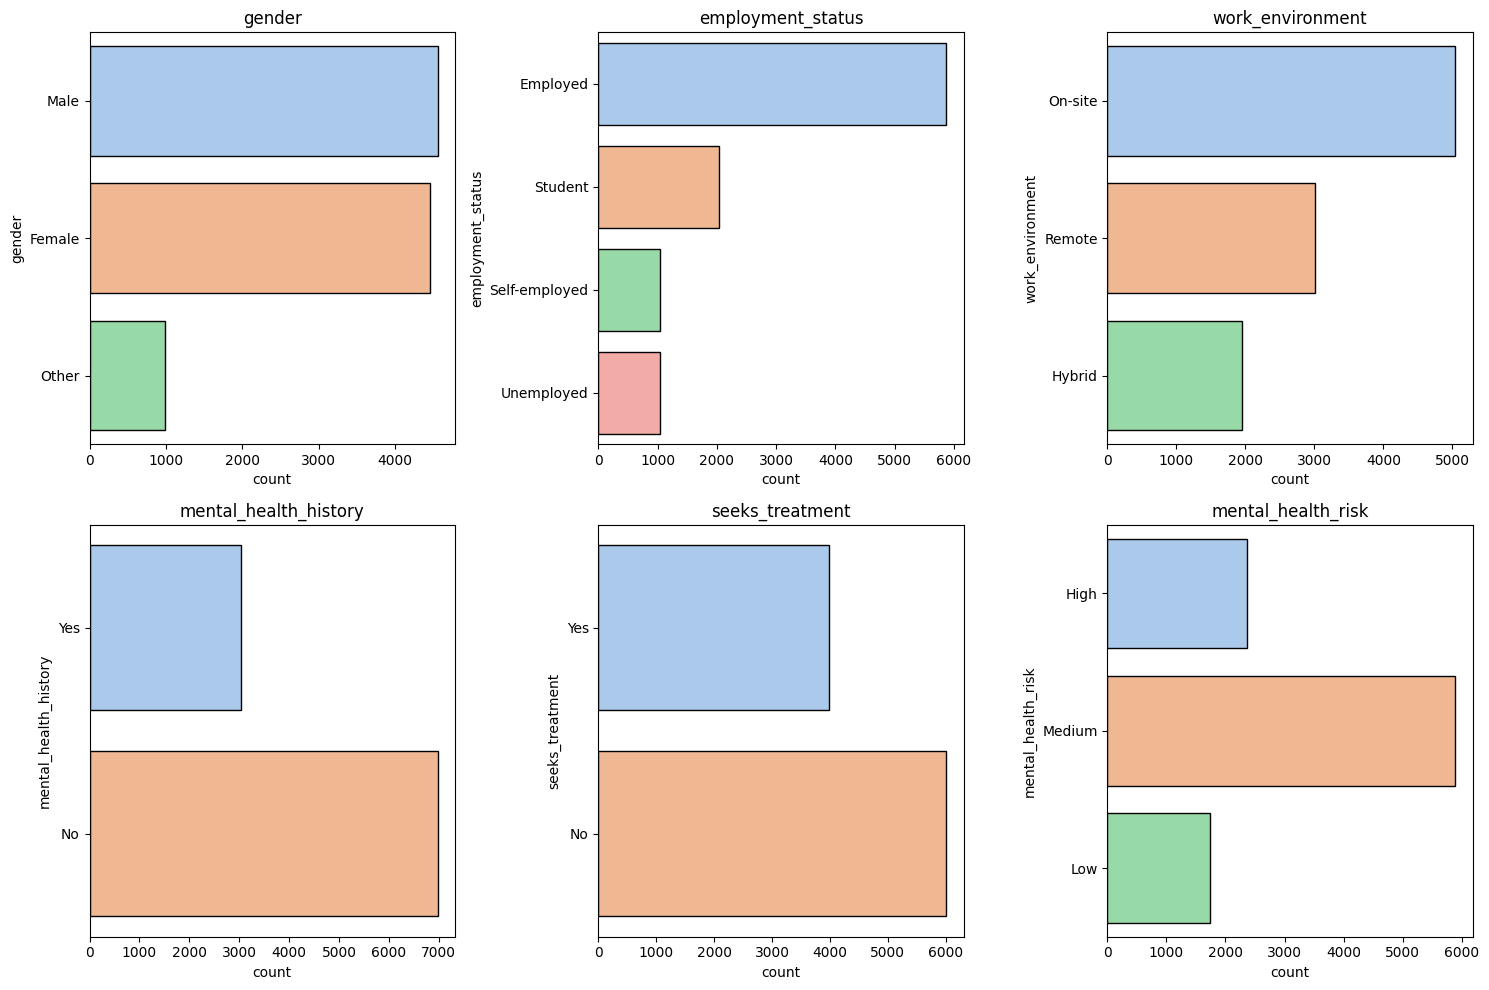

In [11]:
# Kiểm tra sau khi chuẩn hóa
d.barplot()

## **2.5. HANDLE OUTLIER**

In [12]:
# Kiểm tra giá trị skew cho các cột số
d.skewness_for_numeric_cols()

Skew cho các cột:
age                           -0.001251
stress_level                  -0.020437
sleep_hours                   -0.002150
physical_activity_days        -0.004078
depression_score               0.001475
anxiety_score                 -0.023253
social_support_score          -0.004649
productivity_score            -0.079479
productivity_base_on_stress    2.079007
dtype: float64


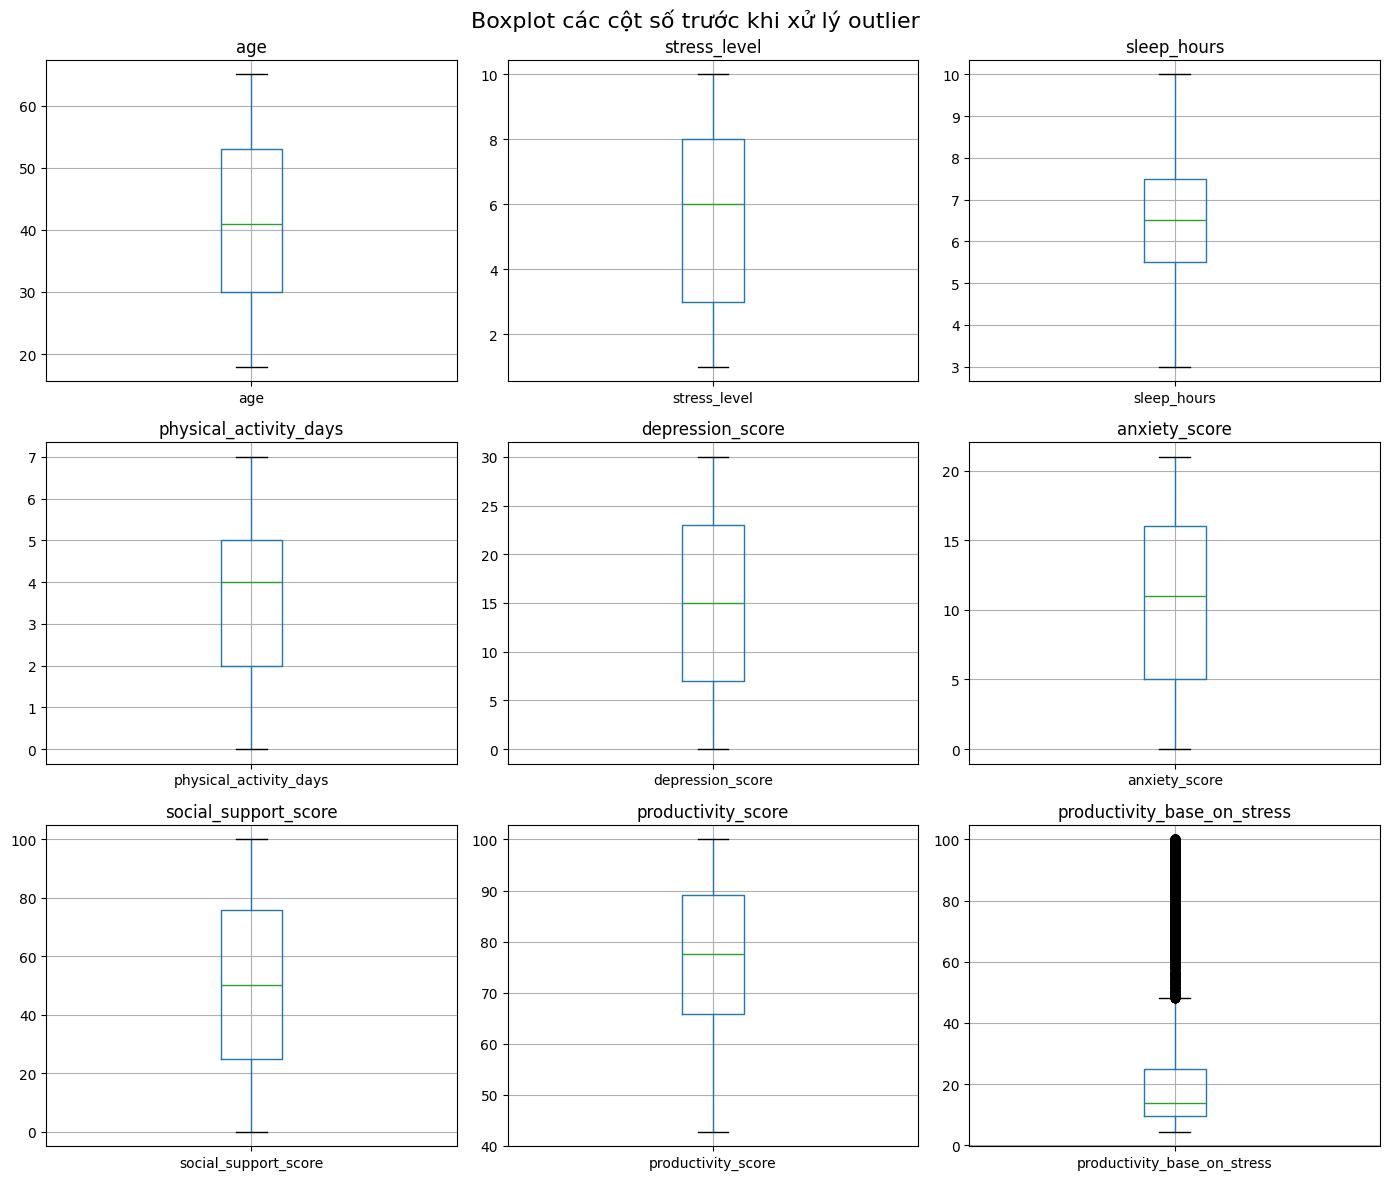

In [13]:
# Boxplot
d.boxplot_for_numeric_cols(title="Boxplot các cột số trước khi xử lý outlier")

In [14]:
# Xử lý outlier
d.handle_outlier()

10000 rows, 15 cols

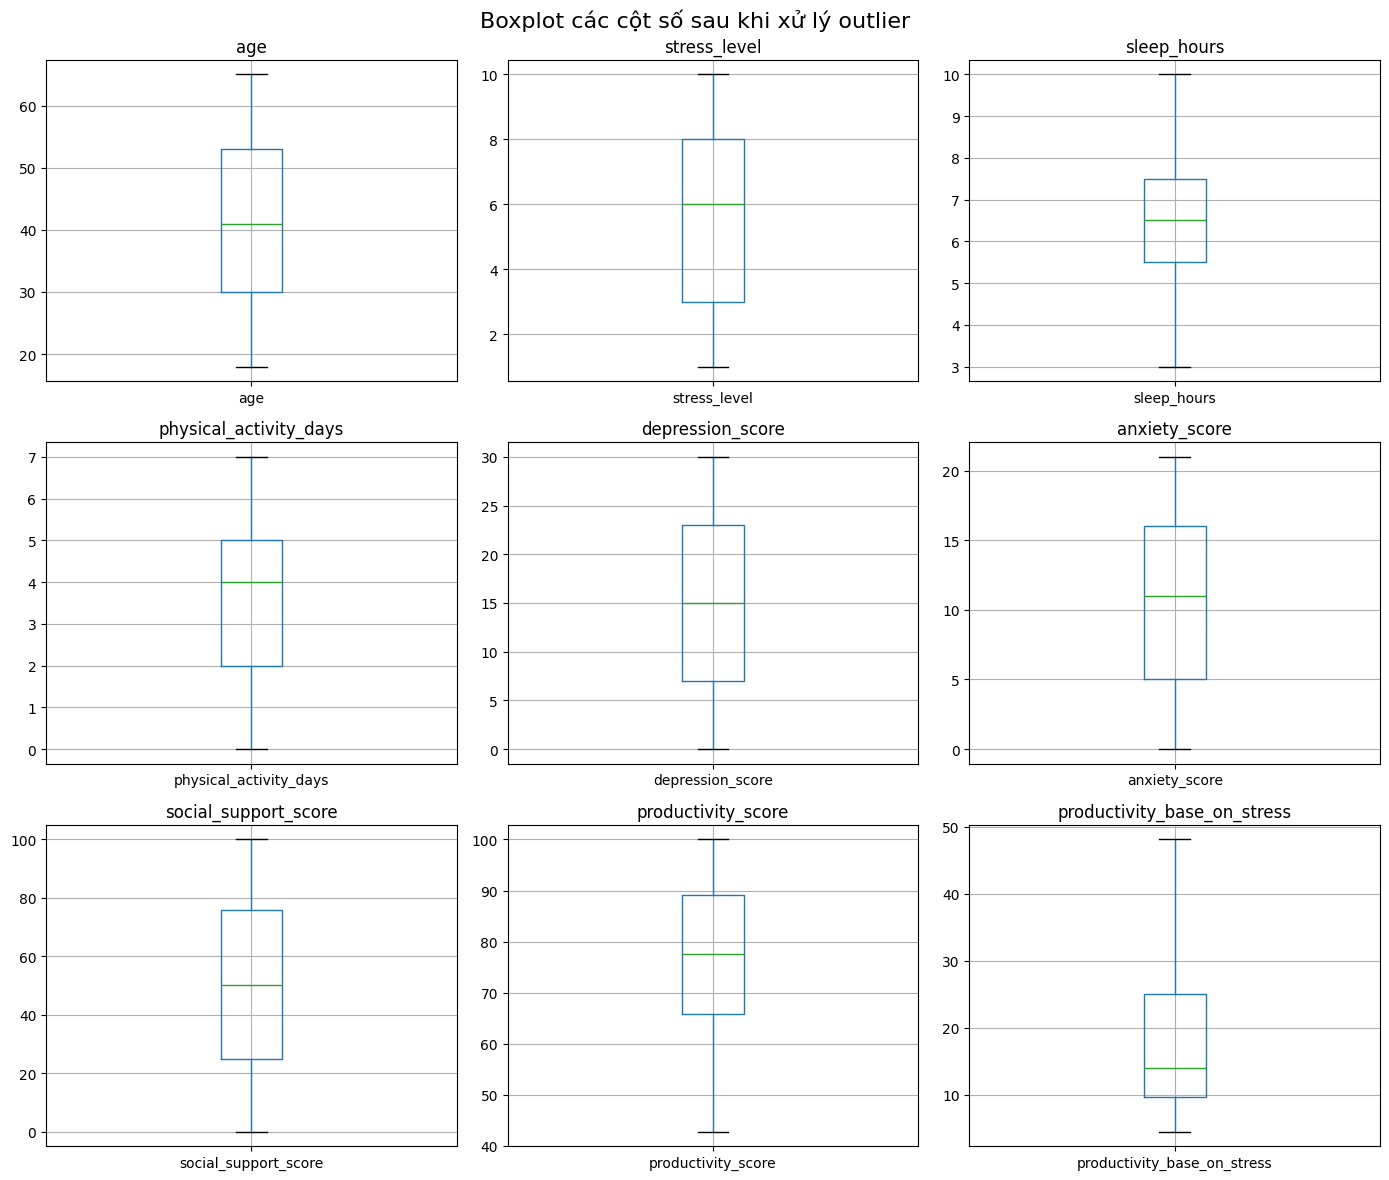

In [15]:
# Boxplot sau khi xử lý
d.boxplot_for_numeric_cols(title="Boxplot các cột số sau khi xử lý outlier")

## **2.6. ENCODE, SCALE VÀ KIỂM TRA TƯƠNG QUAN**

In [16]:
# Encode
encoders = d.encode_categorical()

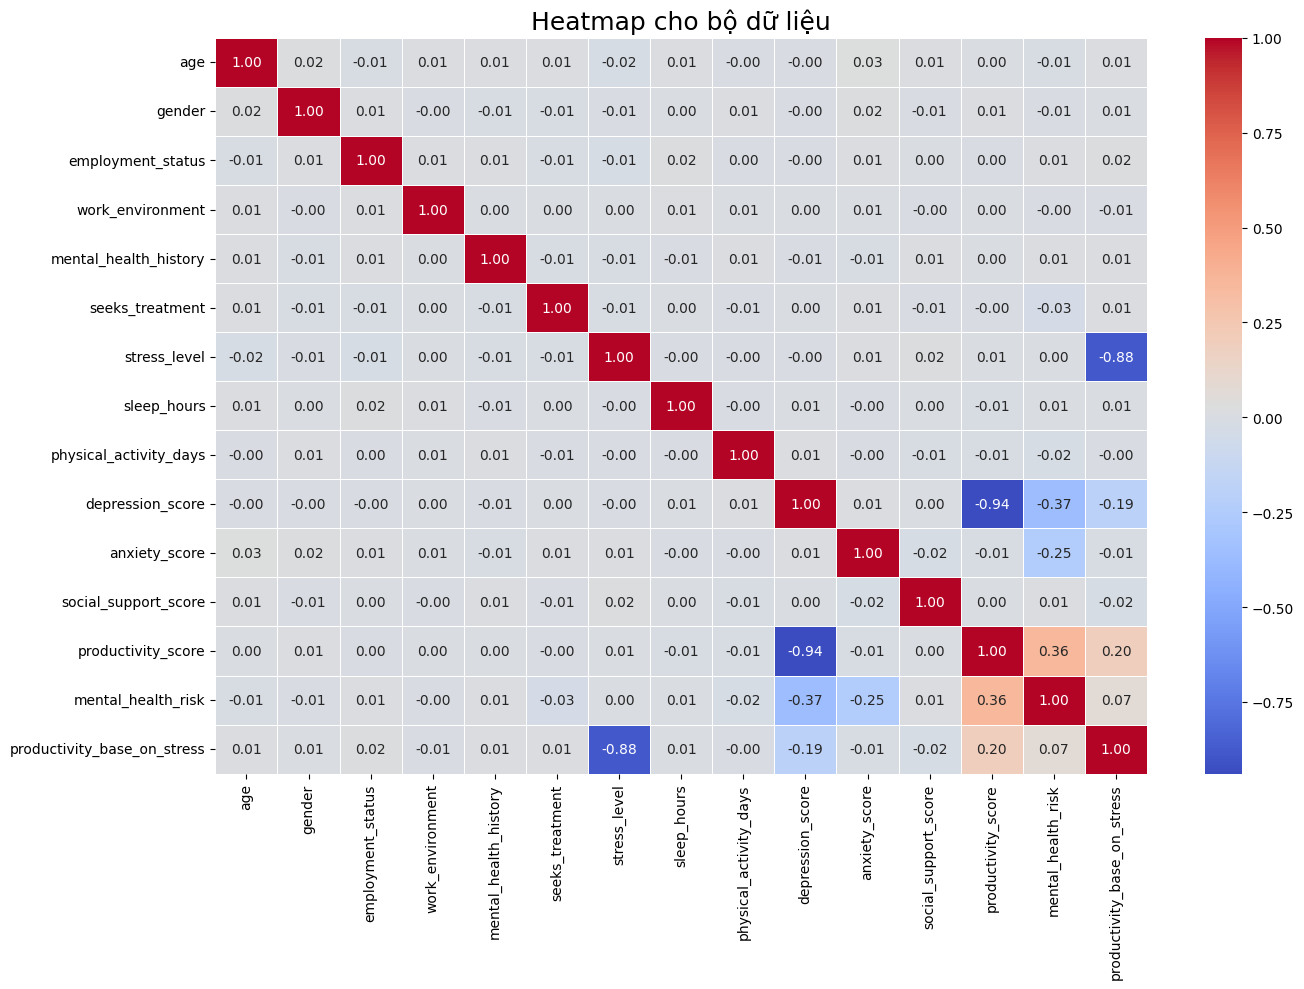

In [17]:
# Vẽ heatmap cho toàn bộ dữ liệu
d.heatmap()

<Figure size 1500x500 with 0 Axes>

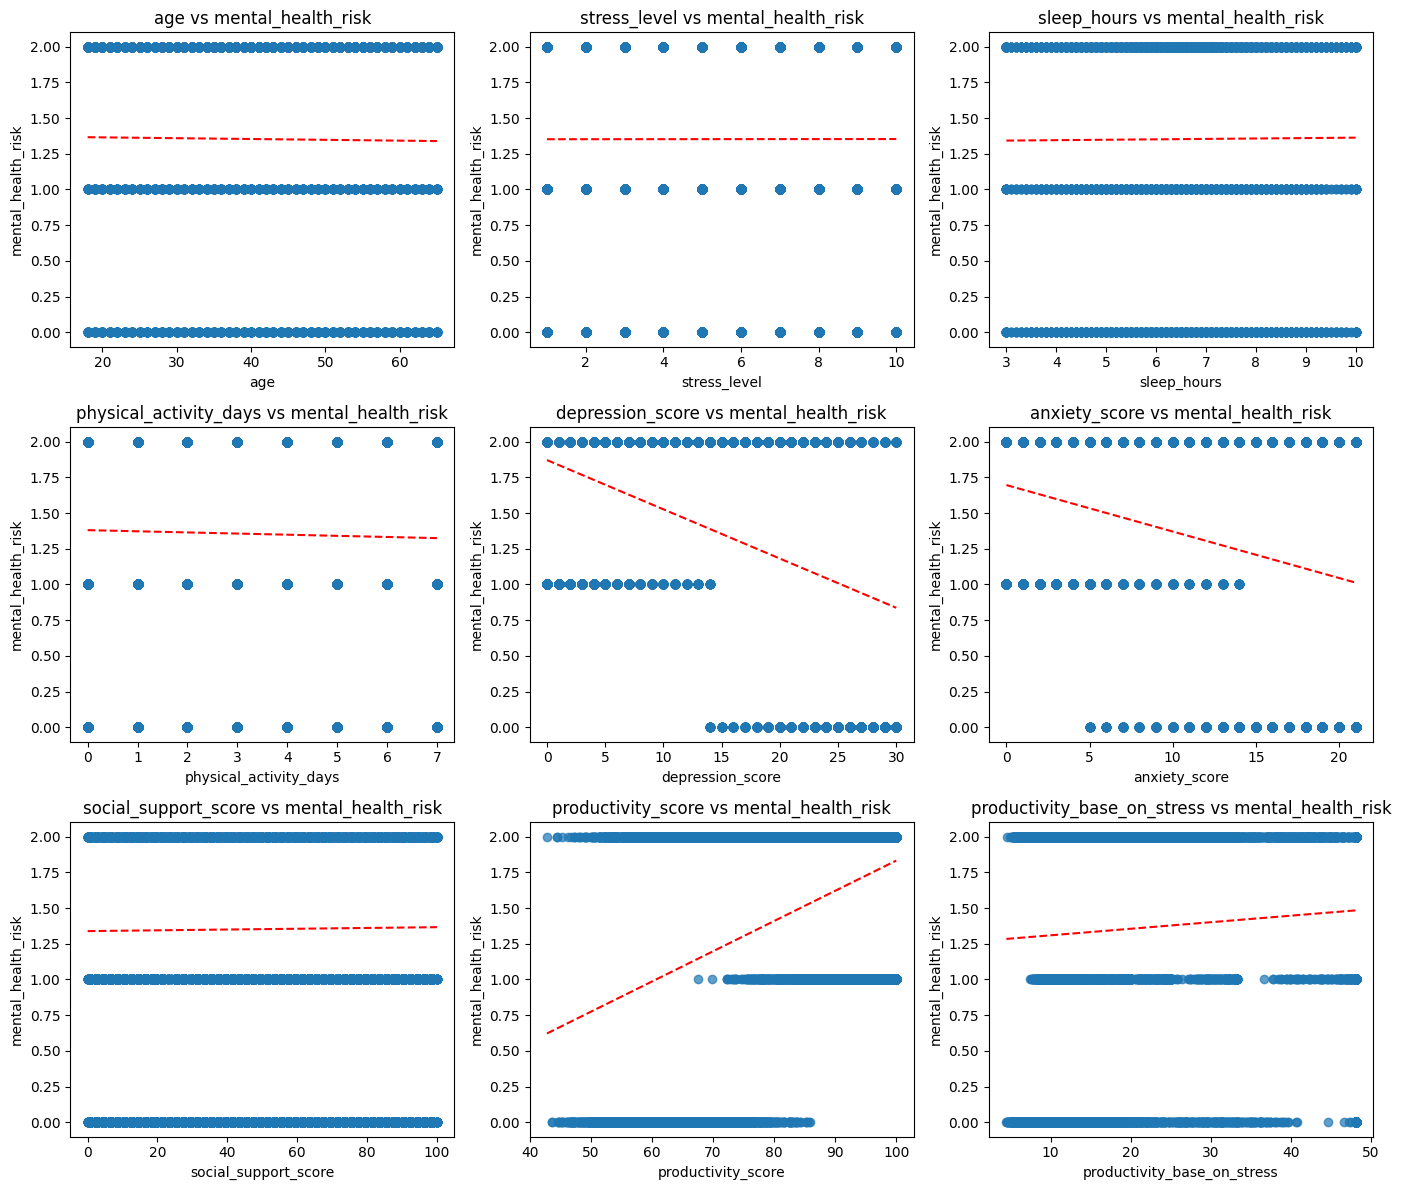

In [18]:
# Kiểm tra tương quan giữa các dữ liệu số với target
d.scatter(target="mental_health_risk")

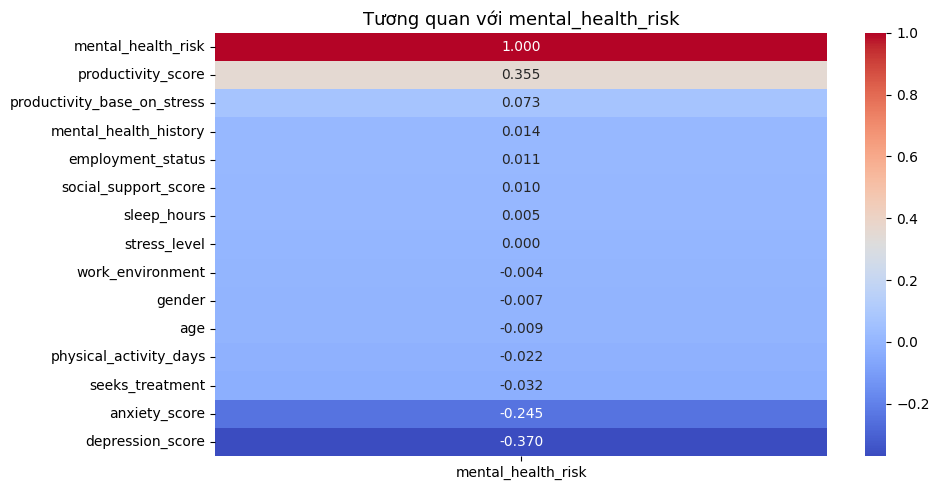

In [19]:
# Tương quan với cột target
d.heatmap_one_column(target="mental_health_risk")

In [20]:
# Scale dữ liệu
scaler = d.scale_features()

## **2.7. XUẤT DỮ LIỆU ĐÃ TIỀN XỬ LÝ**

In [21]:
d.new_data(file_name="new_mental_health_dataset.csv")

# **3. MODEL**

In [22]:
# Khởi tạo pipeline cho việc train model (bao gồm load data và split data)
pipe = (
    ModelTrainPipeline(random_seed=42, scaler=scaler, encoders=encoders, num_cols=num_cols)
    .load_data(data="new_mental_health_dataset.csv", target="mental_health_risk")
    .split_data()
)

## **3.1. LOGISTIC REGRESSION**

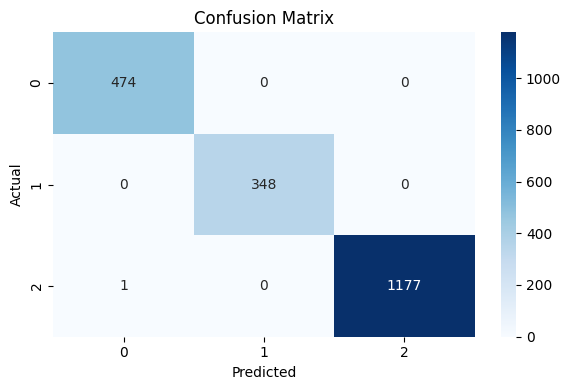

accuracy  precision    recall        f1 roc_auc  roc_auc_ovr
0    0.9995   0.999298  0.999717  0.999507    None     0.999998

In [23]:
# Huấn luyện
pipe.train(model_name="logistic")

# Đánh giá 
pipe.evaluate()

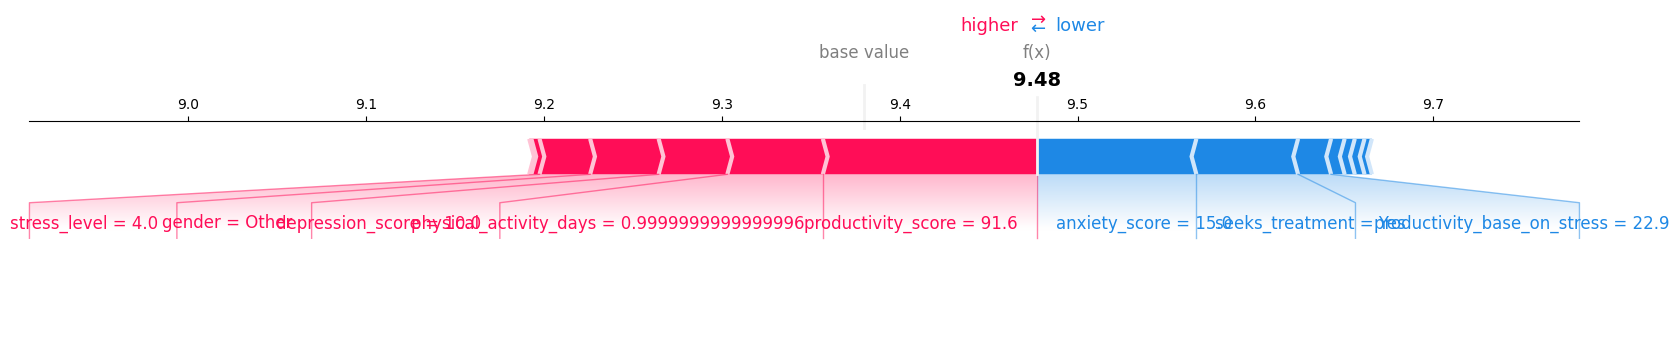

In [24]:
pipe.shap_force(sample_index=200)

## **3.2. RANDOM FOREST**

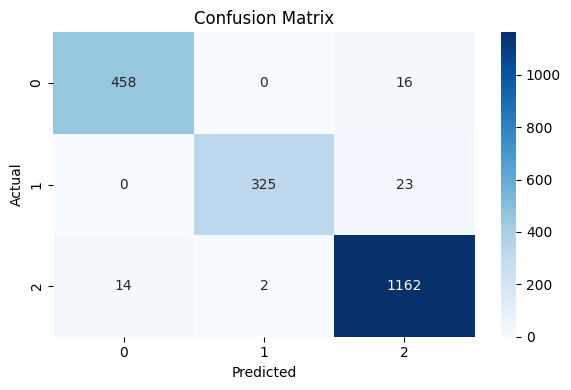

accuracy  precision   recall        f1 roc_auc  roc_auc_ovr
0    0.9725    0.97725  0.96219  0.969377    None     0.998744

In [25]:
# Huấn luyện
pipe.train(model_name="randomforest")

# Đánh giá 
pipe.evaluate()

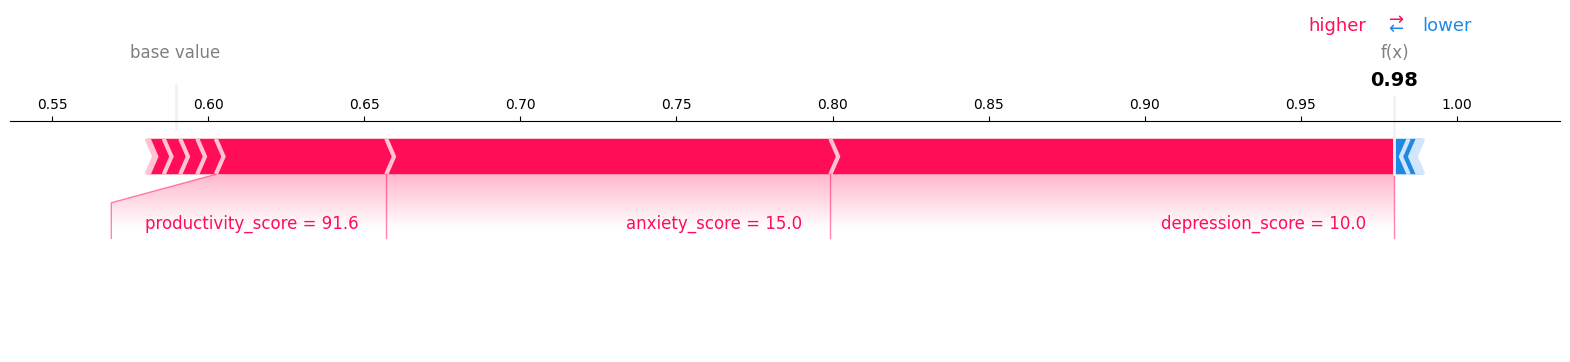

In [26]:
pipe.shap_force(sample_index=200)

## **3.3. LightGBM**

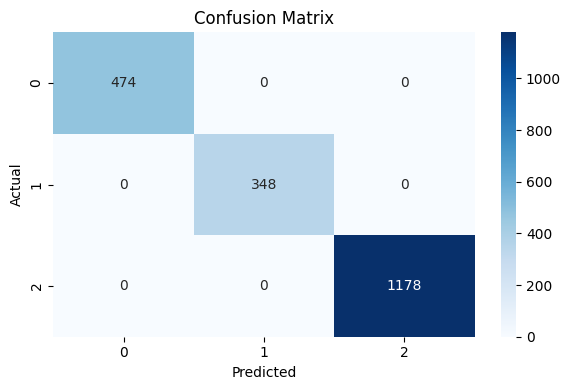

accuracy  precision  recall   f1 roc_auc  roc_auc_ovr
0       1.0        1.0     1.0  1.0    None          1.0

In [27]:
# Huấn luyện
pipe.train(model_name="lightgbm")

# Đánh giá 
pipe.evaluate()

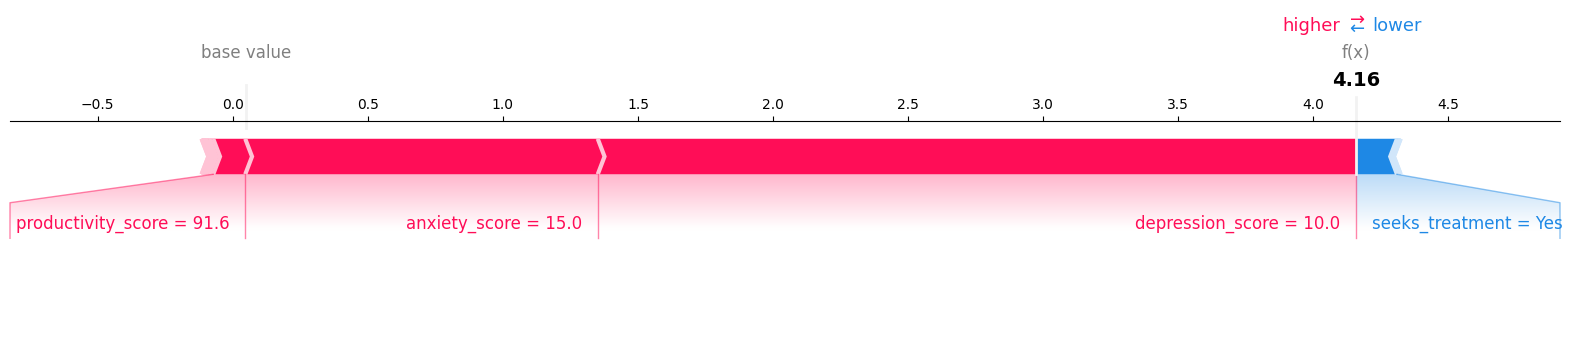

In [28]:
pipe.shap_force(sample_index=200)

## **3.4. XGBOOST**

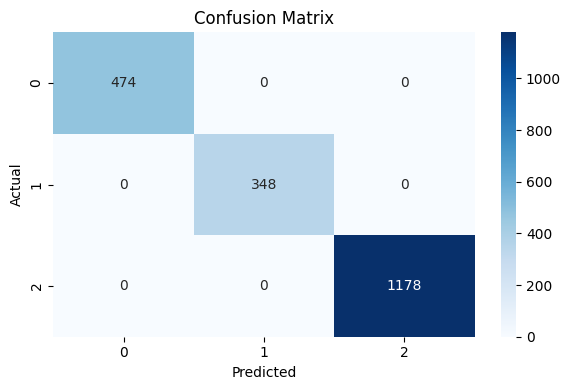

accuracy  precision  recall   f1 roc_auc  roc_auc_ovr
0       1.0        1.0     1.0  1.0    None          1.0

In [29]:
# Huấn luyện
pipe.train(model_name="xgboost")

# Đánh giá 
pipe.evaluate()

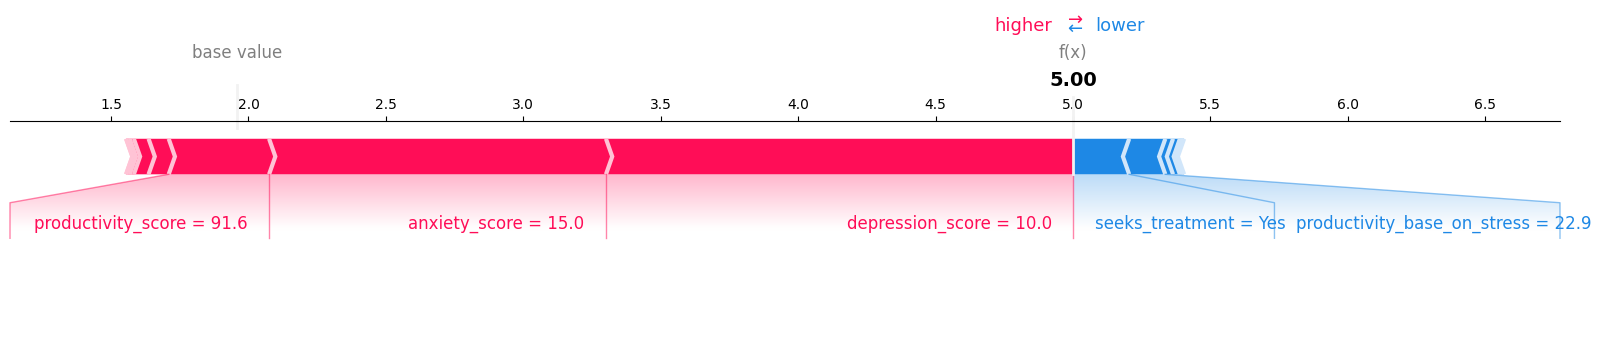

In [30]:
pipe.shap_force(sample_index=200)

## **3.5. BEST MODEL**

In [31]:
best_model = pipe.select_best_model()

In [32]:
print("Mô hình tốt nhất:", best_model["best_model_name"])

Mô hình tốt nhất: xgboost


In [33]:
print("Đánh giá cho tất cả các mô hình:")
best_model["all_metrics"]

Đánh giá cho tất cả các mô hình:


model_name  accuracy  precision    recall        f1 roc_auc  roc_auc_ovr
3      lightgbm    1.0000   1.000000  1.000000  1.000000    None     1.000000
2       xgboost    1.0000   1.000000  1.000000  1.000000    None     1.000000
0      logistic    0.9995   0.999298  0.999717  0.999507    None     0.999998
1  randomforest    0.9725   0.977250  0.962190  0.969377    None     0.998744

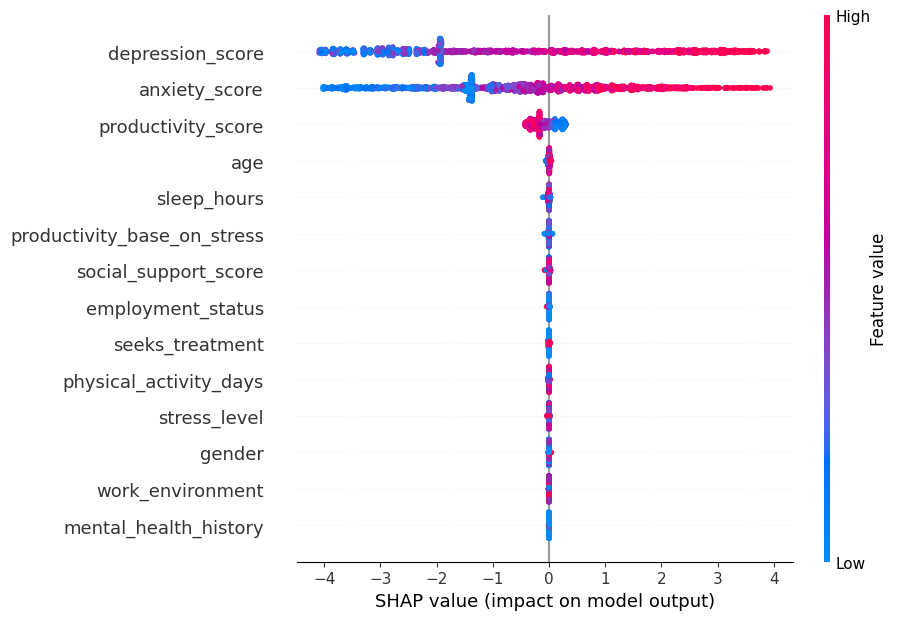

In [34]:
# Vẽ SHAP plot
pipe.shap_beeswarm()

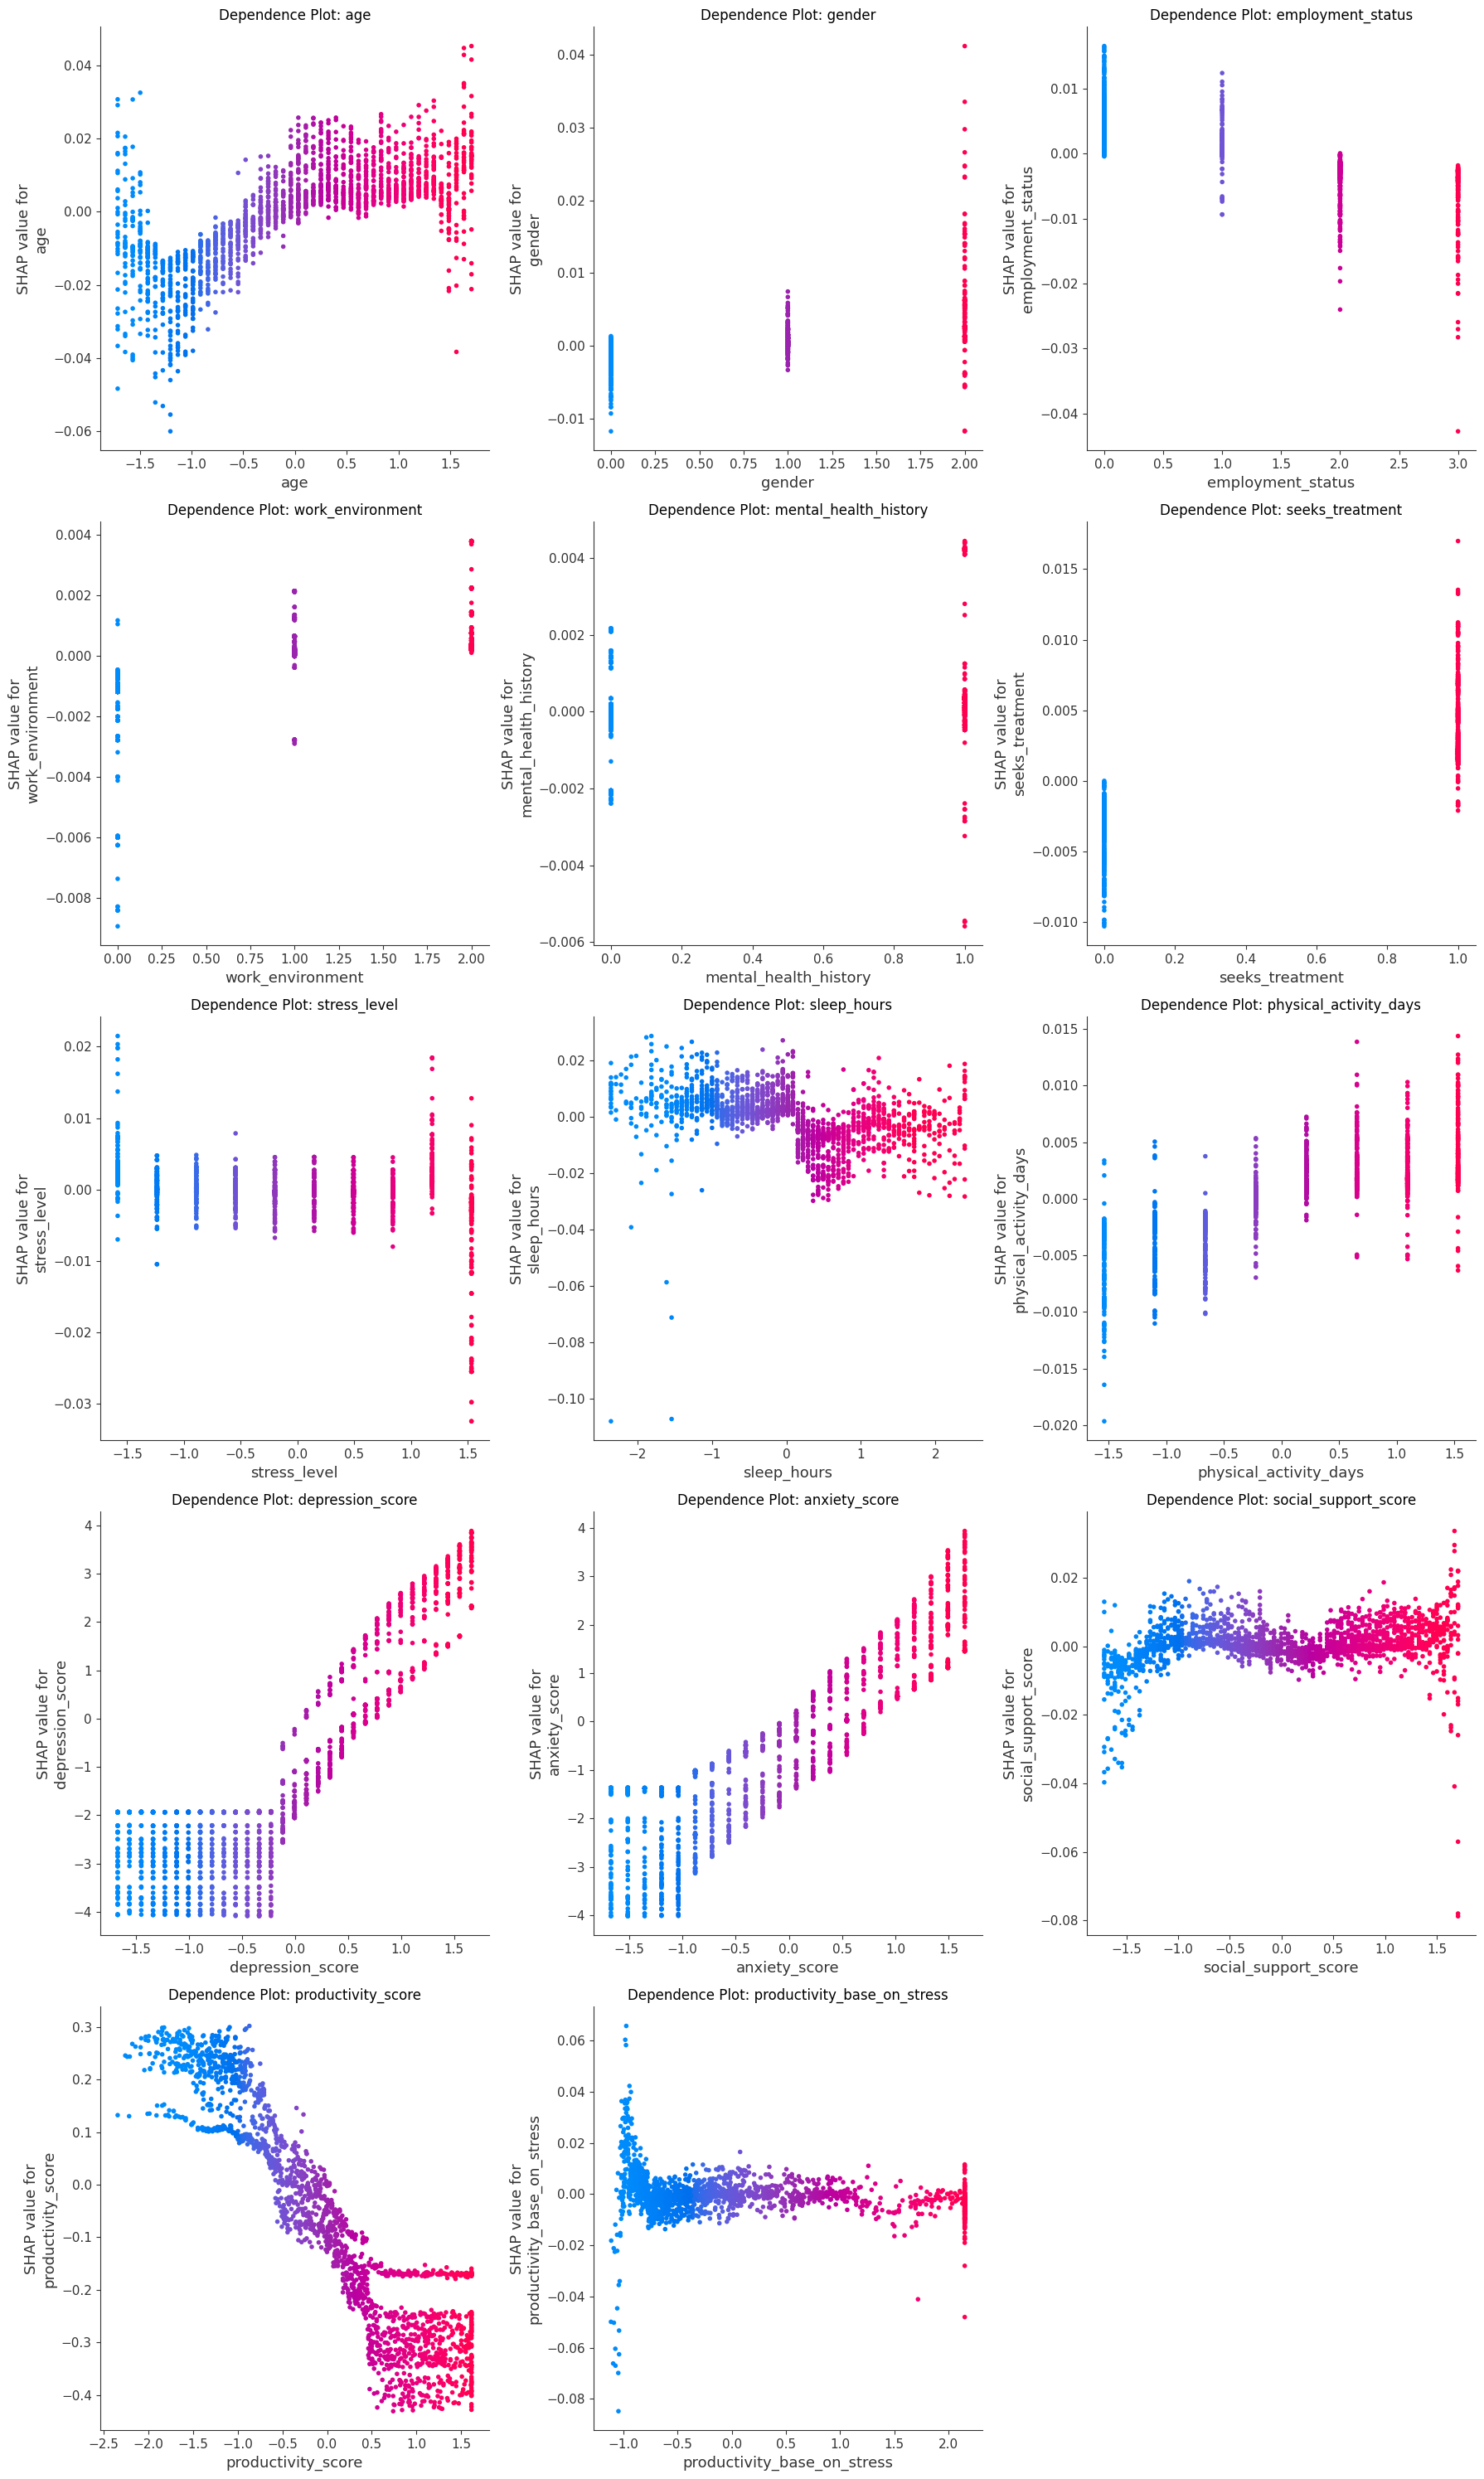

In [35]:
pipe.shap_dependence()

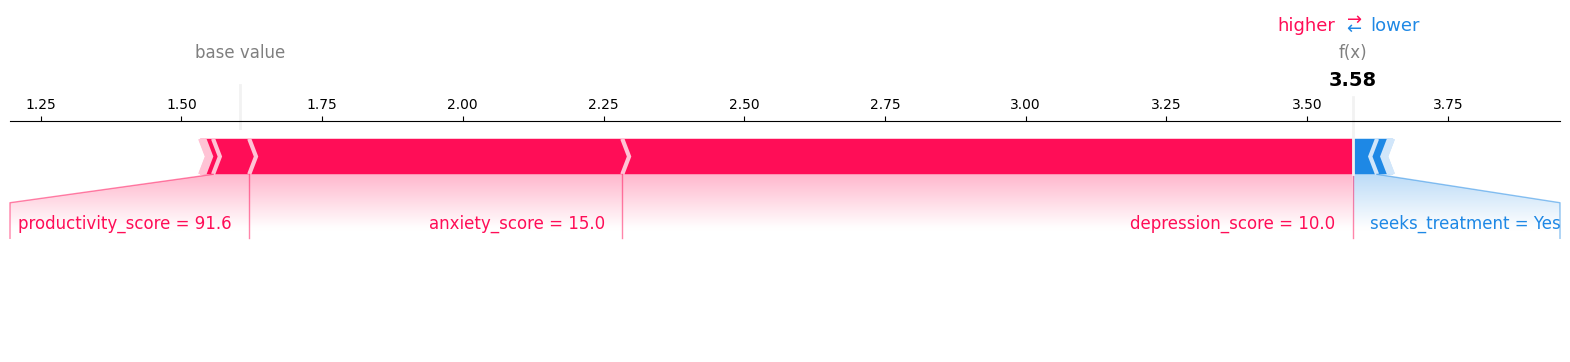

In [36]:
pipe.shap_force(sample_index=200)

In [37]:
# Lưu model
pipe.save("Best_model_with_optuna")

In [38]:
# Tối ưu với grid
best_model = pipe.select_best_model(method="grid")

In [39]:
print("Mô hình tốt nhất:", best_model["best_model_name"])

Mô hình tốt nhất: xgboost


In [40]:
print("Đánh giá cho tất cả các mô hình:")
best_model["all_metrics"]

Đánh giá cho tất cả các mô hình:


model_name  accuracy  precision    recall        f1 roc_auc  roc_auc_ovr
3      lightgbm    1.0000   1.000000  1.000000  1.000000    None     1.000000
2       xgboost    1.0000   1.000000  1.000000  1.000000    None     1.000000
0      logistic    0.9995   0.999298  0.999717  0.999507    None     0.999998
1  randomforest    0.9725   0.977250  0.962190  0.969377    None     0.998744

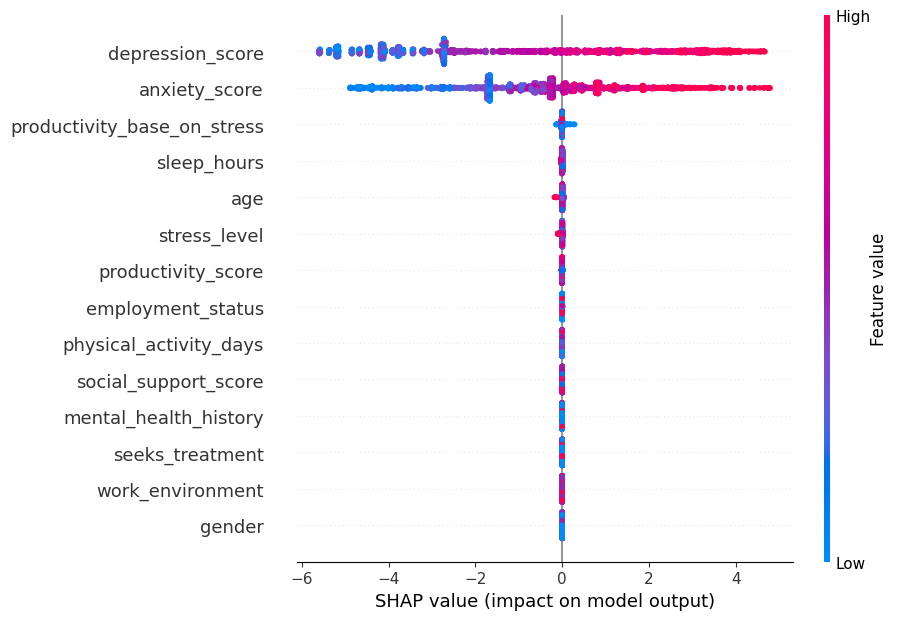

In [41]:
# Vẽ SHAP plot
pipe.shap_beeswarm()

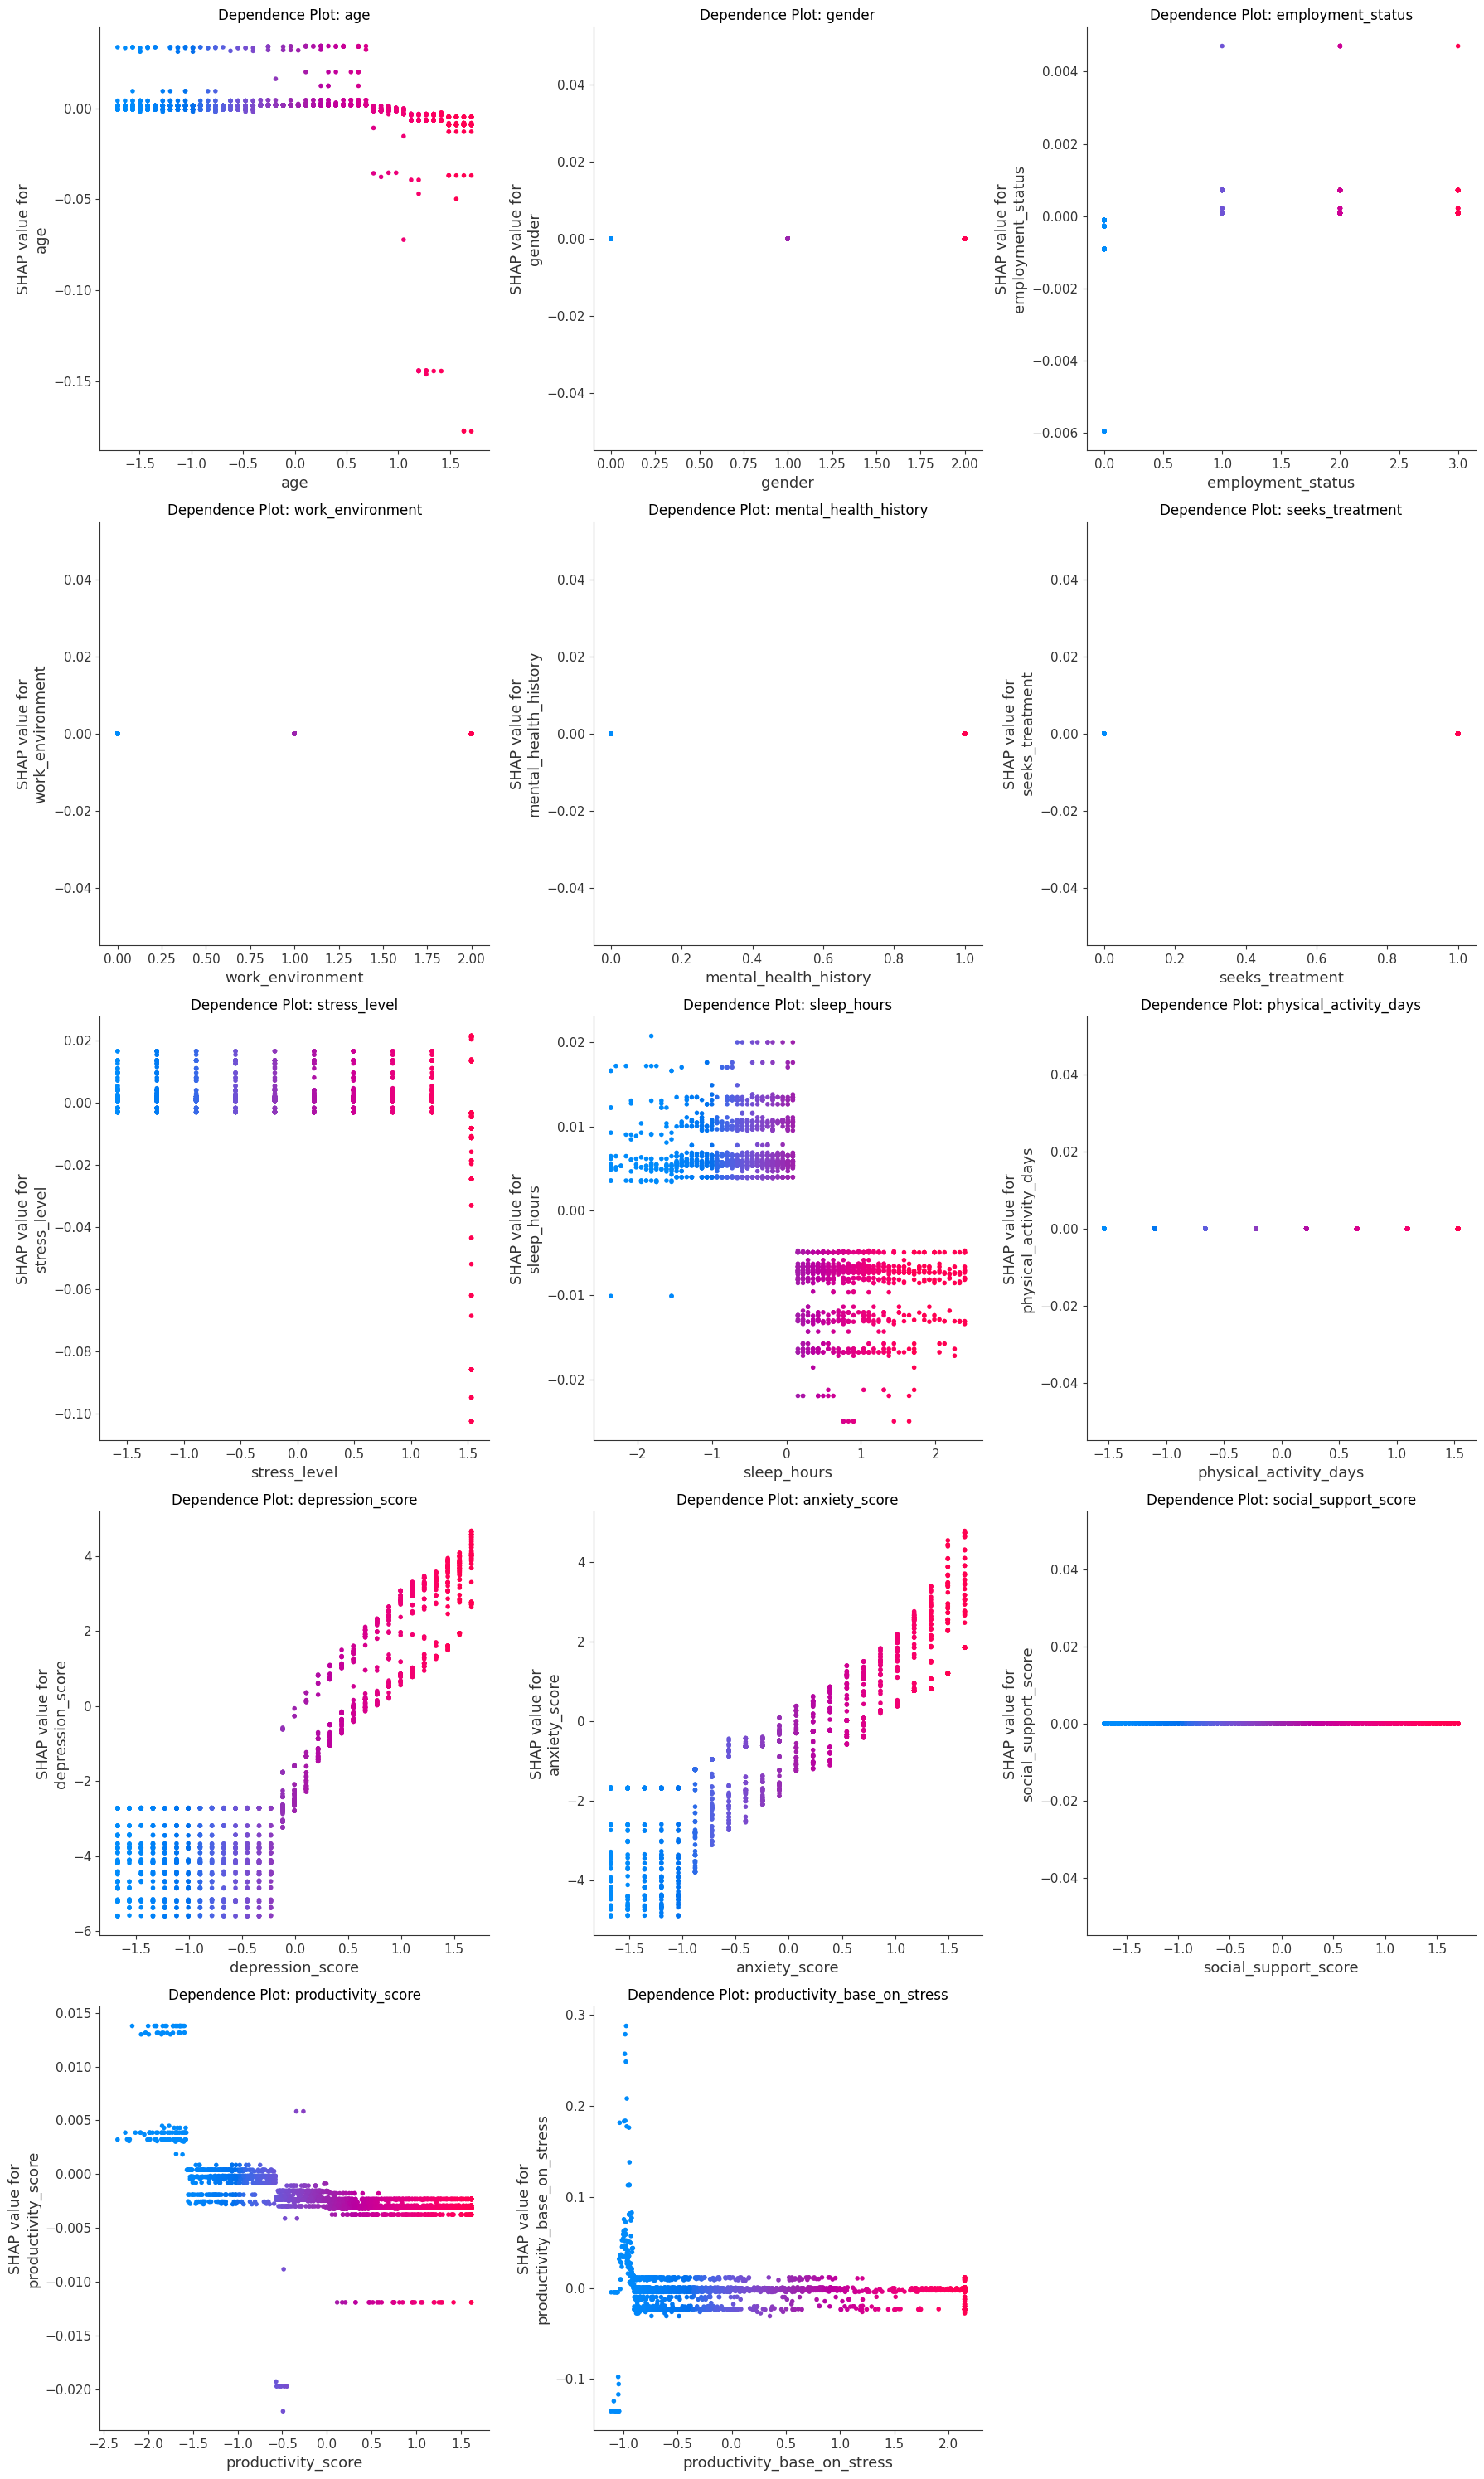

In [42]:
pipe.shap_dependence()

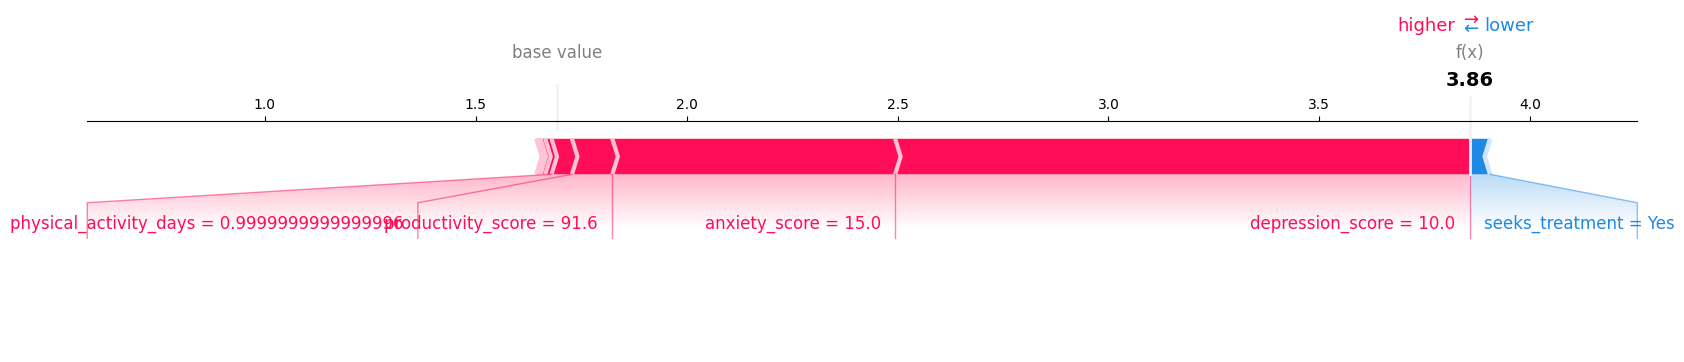

In [43]:
pipe.shap_force(sample_index=200)

In [44]:
# Lưu mô hình
pipe.save("Best_model_with_grid_search")